In [11]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

X, y = fetch_olivetti_faces(random_state=42, return_X_y=True)

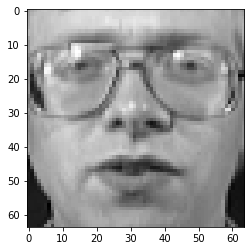

In [12]:
some_image = X[19].reshape((64,64))
plt.imshow(some_image, cmap='gray')

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_val_index in split.split(X,y):
    X_train, X_test_val = X[train_index], X[test_val_index]
    y_train, y_test_val = y[train_index], y[test_val_index]

In [14]:
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for test_index, val_index in split2.split(X_test_val,y_test_val):
    X_test, X_val = X_test_val[test_index], X_test_val[val_index]
    y_test, y_val = y_test_val[test_index], y_test_val[val_index]

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=150)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)

In [16]:
y_pred = rfc.predict(X_val)
accuracy_score(y_pred,y_val)

0.925

In [17]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=100)
X_train_red = kmeans.fit_transform(X_train)
X_val_red = kmeans.transform(X_val)

In [18]:
rfc_red = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=150)
rfc_red.fit(X_train_red, y_train)
y_pred = rfc_red.predict(X_val_red)
accuracy_score(y_pred,y_val)

0.85

Not good, we lost a lot of accuracy after the dimensionality reduction

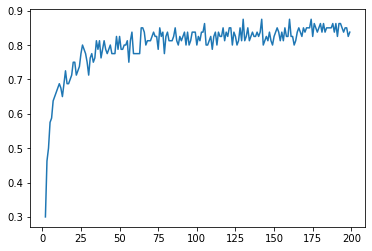

In [20]:
k_range = range(2,200)
scores_list = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    X_train_red = kmeans.fit_transform(X_train)
    X_val_red = kmeans.transform(X_val)
    rfc_red.fit(X_train_red, y_train)
    y_pred = rfc_red.predict(X_val_red)
    scores_list.append(accuracy_score(y_pred,y_val))
    
plt.plot(k_range,scores_list)

In [25]:
print(np.argmax(scores_list),max(scores_list))

128 0.875


That means n_clusters = 130 gave the best results, let's try appending the features

In [34]:
best_kmeans = KMeans(n_clusters=130)
X_train_red = kmeans.fit_transform(X_train)
X_val_red = kmeans.transform(X_val)

X_train_ext = np.c_[X_train, X_train_red]
X_val_ext = np.c_[X_val, X_val_red]

rfc.fit(X_train_ext, y_train)
y_pred = rfc.predict(X_val_ext)
accuracy_score(y_pred,y_val)

0.9375

We actually are able to get a better result than initially! (seen up to 0.95 due to randomness). Let's check on test

In [37]:
X_test_red = kmeans.transform(X_test)
X_test_ext = np.c_[X_test, X_test_red]
y_pred = rfc.predict(X_test_ext)
accuracy_score(y_pred,y_test)

0.9125